In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.model_selection import train_test_split
from typing import Union
datos = pd.read_csv("C:/Users/GRETTEL/Documents/datos_inmunologic_age.csv", header=None)
datos.head()

,0,1,2,3,4,5
0,31.2,9,1.0,0,75.2,72.1
1,24.5,1,0.0,1,66.2,65.1
2,24.6,0,1.0,0,48.6,51.2
3,22.9,0,1.0,0,61.1,46.1
4,30.9,0,0.0,0,50.9,51.5


In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       902 non-null    float64
 1   1       902 non-null    int64  
 2   2       902 non-null    float64
 3   3       902 non-null    int64  
 4   4       902 non-null    float64
 5   5       902 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 42.4 KB


In [3]:
datos.describe()

,0,1,2,3,4,5
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,25.922506,1.761641,0.512528,0.331486,46.893459,47.423614
std,5.231658,2.274150,0.466084,0.471008,15.200252,21.034624
min,13.100000,0.000000,0.000000,0.000000,16.900000,8.400000
25%,22.600000,0.000000,0.000000,0.000000,33.825000,27.125000
50%,25.100000,1.000000,0.500000,0.000000,46.650000,48.600000
75%,28.400000,3.000000,1.000000,1.000000,59.250000,63.550000
max,52.100000,10.000000,1.000000,1.000000,78.900000,90.000000


In [4]:
datos.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

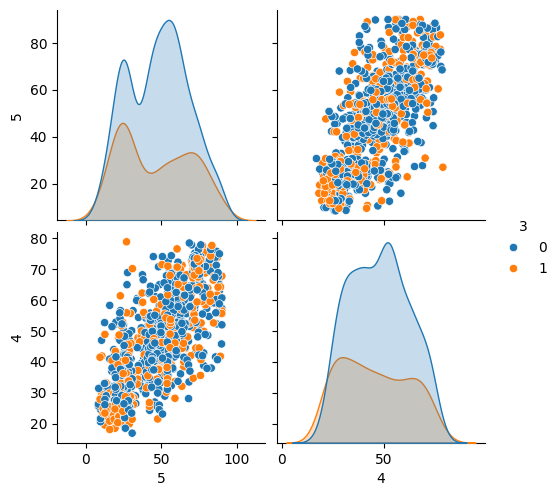

In [5]:
import seaborn as sns
g=sns.pairplot(datos,vars=[5,4],hue=3)


In [6]:
datos.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [7]:
y=datos[4]
x = datos[[0,1, 2, 3, 5]]

In [8]:
y.shape

(902,)

In [9]:

x.shape

(902, 5)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                        train_size   = 0.8, shuffle= True)


In [15]:
x_train.shape

(721, 5)

In [16]:
x_test.shape

(181, 5)

In [17]:
import pandas as pd
print('Correlación con el BMI ',datos[0].corr(datos[4], method='pearson'))
print('Correlación con la cormobilidad ',datos[1].corr(datos[4], method='pearson'))
print('Correlación con CMV ',datos[2].corr(datos[4], method='pearson'))
print('Correlación con el genero ',datos[3].corr(datos[4], method='pearson'))
print('Correlación con la edad ',datos[5].corr(datos[4], method='pearson'))


Correlación con el BMI  0.2157755342051538
Correlación con la cormobilidad  0.3299484578594918
Correlación con CMV  0.05378220423195272
Correlación con el genero  -0.06837195141925934
Correlación con la edad  0.724127175909007


In [18]:
corr_matrix = datos.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,4,5,0.724127,0.724127
1,1,5,0.396372,0.396372
2,1,4,0.329948,0.329948
3,0,4,0.215776,0.215776
4,0,5,0.202229,0.202229
5,2,3,-0.104885,0.104885
6,0,1,0.084138,0.084138
7,0,3,-0.069556,0.069556
8,3,4,-0.068372,0.068372
9,0,2,0.063922,0.063922


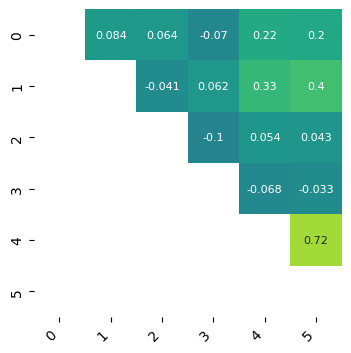

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

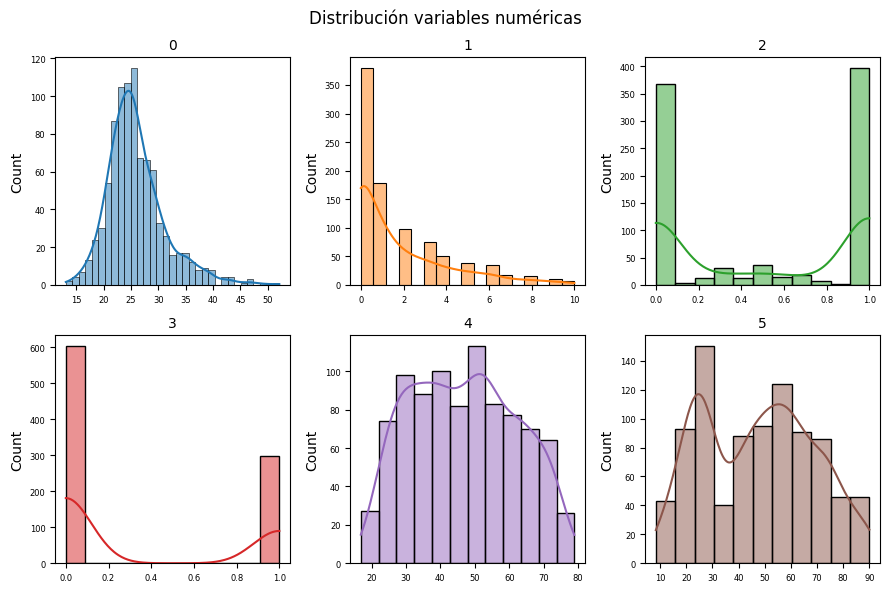

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12);

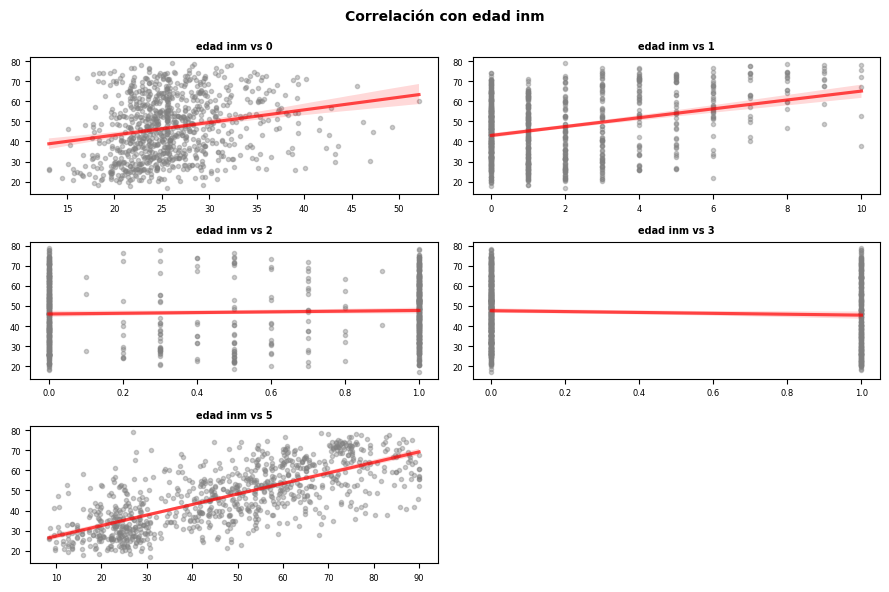

In [21]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 6))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop(4)

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos[4],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"edad inm vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con edad inm', fontsize = 10, fontweight = "bold");

In [22]:
#Ajuste del modelo
import statsmodels.api as sm
x_train = sm.add_constant(x_train, prepend=True).rename(columns={'const':'intercept'}) 
modelo  = sm.OLS(endog=y_train, exog=x_train)
modelo_res = modelo.fit()
print(modelo_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      4   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     153.2
Date:                Fri, 17 May 2024   Prob (F-statistic):          1.64e-110
Time:                        12:59:39   Log-Likelihood:                -2720.0
No. Observations:                 721   AIC:                             5452.
Df Residuals:                     715   BIC:                             5480.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.0841      2.114      8.554      0.0

In [23]:
# Funciones de selecciçon forward y backward para modelos lineales 

def forward_selection(
    x: pd.DataFrame,
    y: pd.Series,
    criterio: str='rsquared_adj',
    add_constant: bool=True,
    verbose: bool=True
)-> list:
    
    if add_constant:
        x = sm.add_constant(x, prepend=True).rename(columns={'const':'intercept'})

    restantes = x.columns.to_list()
    seleccion = []
    if criterio == 'rsquared_adj':
        mejor_metrica = -np.inf
        ultima_metrica = -np.inf
    else:
        mejor_metrica = np.inf
        ultima_metrica = np.inf

    while restantes:
        metricas = []
        for candidata in restantes:
            seleccion_temp = seleccion + [candidata]
            modelo  = sm.OLS(endog=y, exog=x[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                mejor_variable = restantes[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                mejor_variable = restantes[np.argmin(metricas)]
            else:
                break
                
        seleccion.append(mejor_variable)
        restantes.remove(mejor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return (seleccion)

In [24]:
def backward_selection(
    x: pd.DataFrame,
    y: pd.Series,
    criterio: str='rsquared_adj',
    add_constant: bool=True,
    verbose: bool=True
)-> list:
    if add_constant:
        x = sm.add_constant(x, prepend=True).rename(columns={'const':'intercept'})

    seleccion = x.columns.to_list()
    modelo  = sm.OLS(endog=y, exog=x[seleccion])
    modelo_res = modelo.fit()
    ultima_metrica = getattr(modelo_res, criterio)
    mejor_metrica = ultima_metrica
    if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    while seleccion:
        metricas = []
        for candidata in seleccion:
            seleccion_temp = seleccion.copy()
            seleccion_temp.remove(candidata)
            modelo  = sm.OLS(endog=y, exog=x[seleccion_temp])
            modelo_res = modelo.fit()
            metrica = getattr(modelo_res, criterio)
            metricas.append(metrica)
        if criterio == 'rsquared_adj':
            mejor_metrica = max(metricas)
            if mejor_metrica > ultima_metrica:
                peor_variable = seleccion[np.argmax(metricas)]
            else:
                break
        else:
            mejor_metrica = min(metricas)
            if mejor_metrica < ultima_metrica:
                peor_variable = seleccion[np.argmin(metricas)]
            else:
                break
                
        seleccion.remove(peor_variable)
        ultima_metrica = mejor_metrica

        if verbose:
            print(f'variables: {seleccion} | {criterio}: {mejor_metrica:.3f}')

    return (seleccion)

In [25]:
# Selección de variables hacia forward
predictores = forward_selection(
    x            = x_train,
    y            = y_train,
    criterio     = 'rsquared_adj',
    add_constant = False,
    verbose      = True
)
predictores

variables: [5] | rsquared_adj: 0.918
variables: [5, 0] | rsquared_adj: 0.949
variables: [5, 0, 2] | rsquared_adj: 0.950
variables: [5, 0, 2, 1] | rsquared_adj: 0.950


[5, 0, 2, 1]

In [26]:
predictores= backward_selection(
    x            = x_train,
    y            = y_train,
    criterio     = 'rsquared_adj',
    add_constant = False,
    verbose      = True
)
predictores

variables: ['intercept', 0, 1, 2, 3, 5] | rsquared_adj: 0.514
variables: [0, 1, 2, 3, 5] | rsquared_adj: 0.950
variables: [0, 1, 2, 5] | rsquared_adj: 0.950


[0, 1, 2, 5]

In [27]:
# Entrenamiento del modelo con las variables seleccionadas
modelo_final  = sm.OLS(endog=y_train, exog=x_train[predictores])
modelo_final_res = modelo_final.fit()
print(modelo_final_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      4   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              3404.
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        13:00:10   Log-Likelihood:                         -2755.1
No. Observations:                 721   AIC:                                      5518.
Df Residuals:                     717   BIC:                                      5537.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
# Residuos del modelo
residuos = modelo_final_res.resid

In [30]:
# prediciones de entrenamiento

prediccion_train = modelo_final_res.predict(x_train[predictores])

C:\Users\GRETTEL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


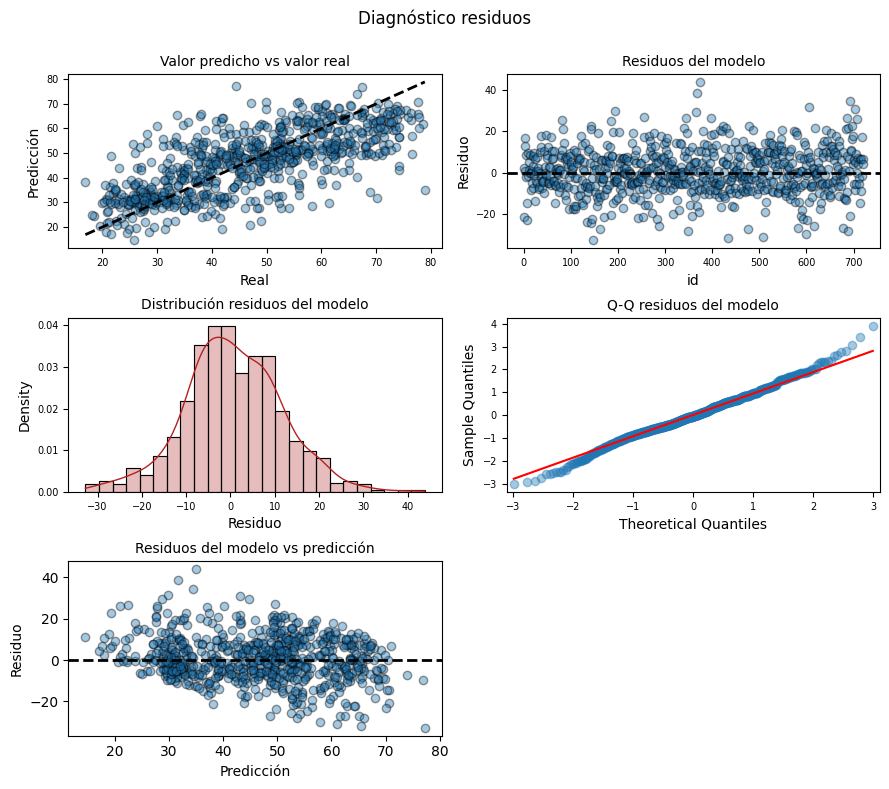

In [31]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12);

In [32]:
# Prediciones del conjunto de prueba 
x_test = sm.add_constant(x_test, prepend=True).rename(columns={'const':'intercept'})
modelo_final_res.predict(x_test[predictores])

122    50.998155
85     39.949186
549    59.477185
712    25.211572
317    58.556277
         ...    
885    32.200188
626    25.731845
195    41.652707
68     43.457625
313    61.173901
Length: 181, dtype: float64

In [33]:
# Predicciones con intervalo de confianza 
predicciones = modelo_final_res.get_prediction(exog = x_test[predictores]).summary_frame(alpha=0.05)
predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
122,50.998155,0.757063,49.511829,52.484480,29.194779,72.801530
85,39.949186,0.691518,38.591545,41.306828,18.154205,61.744167
549,59.477185,0.871602,57.765988,61.188382,37.657327,81.297043
712,25.211572,0.755387,23.728536,26.694607,3.408420,47.014723
317,58.556277,0.957971,56.675514,60.437041,36.722467,80.390088
...,...,...,...,...,...,...
885,32.200188,0.627375,30.968475,33.431900,10.412688,53.987687
626,25.731845,0.741811,24.275463,27.188227,3.930491,47.533200
195,41.652707,0.676748,40.324063,42.981351,19.859513,63.445901
68,43.457625,0.595898,42.287712,44.627538,21.673532,65.241718


In [36]:
# Error de test del modelo
error = rmse(y_test, predicciones['mean'])
print(f"El error de test es: {error}")

El error de test es: 10.223991718566838
